In [34]:
from baixa_curvas import bmf
from datetime import datetime

In [ ]:
import pandas as pd

dt = pd.read_csv('datas_curva_pre.csv')
dt.columns = ['Datas']

In [32]:
data1 = datetime.strptime('2022-04-13', '%Y-%m-%d')
data2 = datetime.strptime('2021-12-13', '%Y-%m-%d')
gera_bmf1 = bmf(data1)
gera_bmf2 = bmf(data2)

df_pre1 = gera_bmf1._baixa_pre()
df_pre1['Data'] = data1
df_pre1.columns = ['taxas252', 'taxas360', 'Data']

df_pre2 = gera_bmf2._baixa_pre()
df_pre2['Data'] = data2
df_pre2.columns = ['taxas252', 'taxas360', 'Data']

<AxesSubplot:>

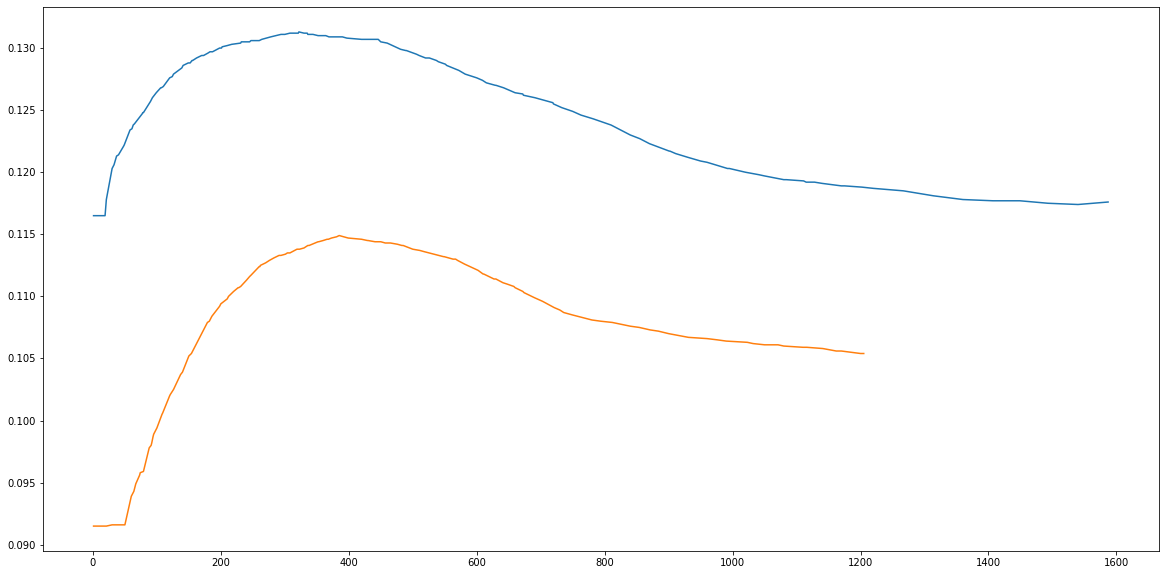

In [33]:
df_pre1['taxas252'][:150].plot(figsize =(20,10))
df_pre2['taxas252'][:150].plot(figsize =(20,10))

In [14]:
df_cupom = gera_bmf._baixa_cupom()
df_cupom['Data'] = data
df_cupom.columns = ['taxas360', 'Data']

<AxesSubplot:>

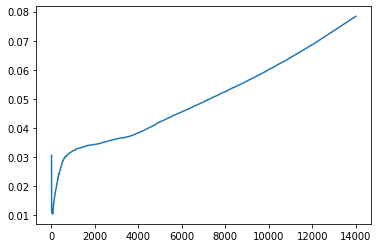

In [20]:
df_cupom['taxas360'][5:].plot()

In [21]:
df_pre = gera_bmf._baixa_pre()
df_pre['Data'] = data
df_pre.columns = ['taxas252', 'taxas360', 'Data']

In [22]:
df_pre

,taxas252,taxas360,Data
1,0.1165,0.0000,2022-04-13
5,0.1165,0.0650,2022-04-13
7,0.1165,0.0941,2022-04-13
14,0.1165,0.0941,2022-04-13
15,0.1165,0.0990,2022-04-13
...,...,...,...
10170,0.1192,0.1170,2022-04-13
10351,0.1192,0.1170,2022-04-13
10800,0.1192,0.1170,2022-04-13
12087,0.1192,0.1170,2022-04-13


<AxesSubplot:>

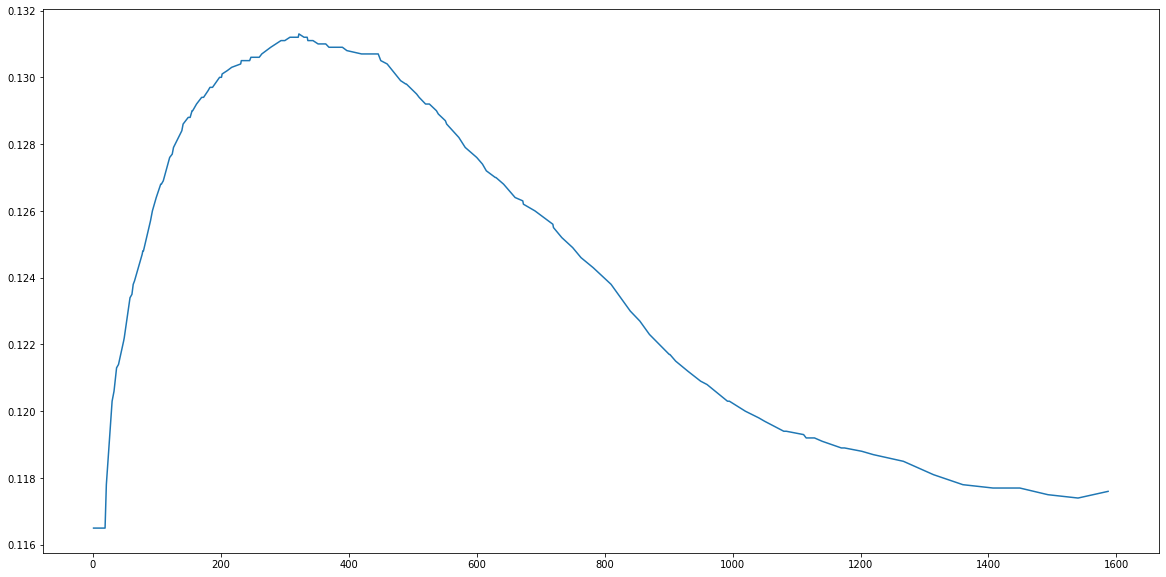

In [27]:
df_pre['taxas252'][:150].plot(figsize =(20,10))

In [ ]:
gera_bmf.